ColDefs(
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    name = 'STARFLAG'; fo

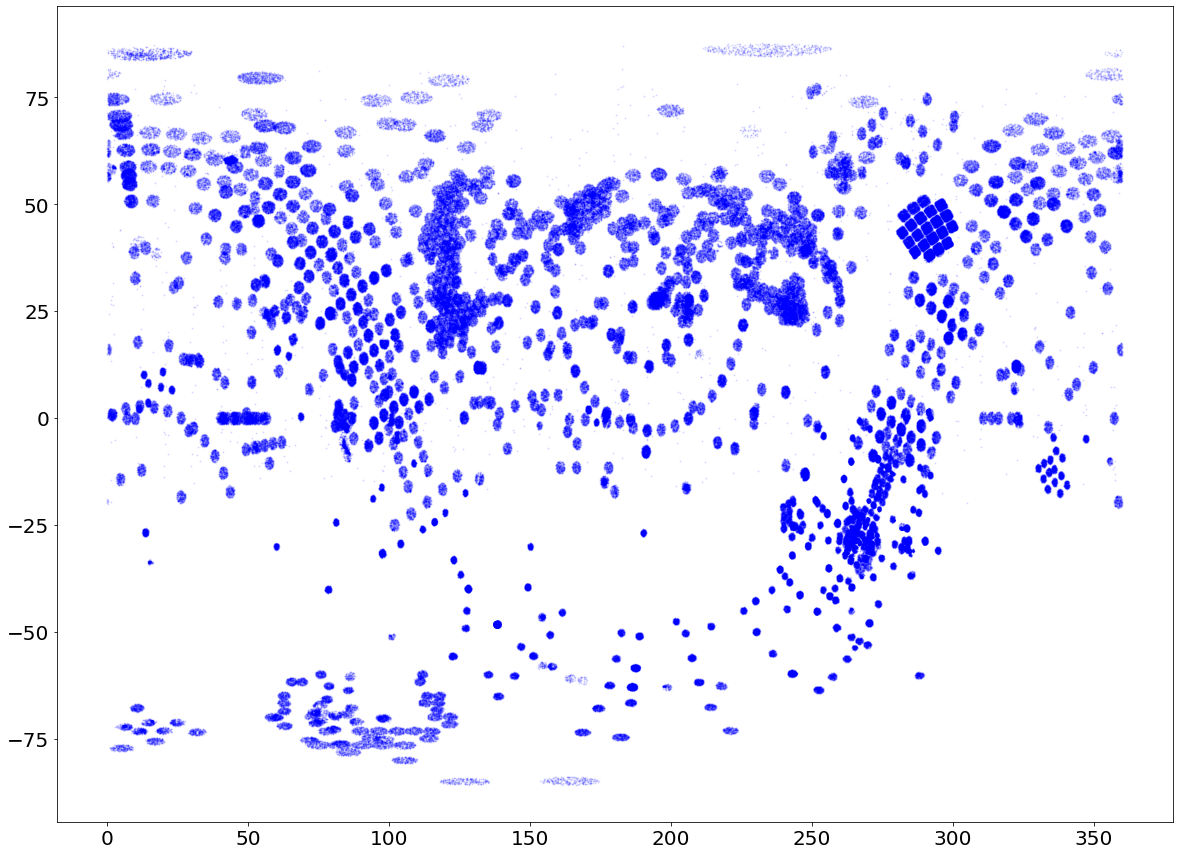

In [186]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x*np.pi*2 + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('data/allStarLite-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]  # apply to data


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

In [2]:
## combining error so sigma=sqrt(sigma1**2+sigma2**2) so combined error is 
## the sqrt of error1 squared plus error2 squared

# mcFit for 2, 3, and 4 parameter fuctions...

In [ ]:
mcFit2
def mcFit2(function, A, A_ERR, C, C_ERR, p0):
    slopes = list()
    ints = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A + A_ERR*weights4A
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj)
        slopes.append(params[0])
        ints.append(params[1])
    
    return slopes, ints

A_output, C_output = mcFit2(linear,star['X'][good2], star['X_ERR'][good2], star['Y'][good2], star['Y_ERR'][good2], 0)


print('mean slope: {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(A_output), np.mean(C_output)))

mcFit3
def mcFit3(function, A, A_ERR, C, C_ERR, p0):
    a_param = list()
    b_param = list()
    c_param = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A + A_ERR*weights4A
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj)
        a_param.append(params[0])
        b_param.append(params[1])
        c_param.append(params[2])
    
    return a_param, b_param, c_param

A_output, B_output, C_output = mcFit3(poly2,star['X'][good2], star['X_ERR'][good2], star['Y'][good2], star['Y_ERR'][good2], 0)


print('mean A: {:6.4f}, mean B: {:6.4f}, mean C: {:6.4f}'.format(np.mean(A_output), np.mean(B_output), np.mean(C_output)))

mcFit4
def mcFit4(function, A, A_ERR, C, C_ERR, p0):
    a_param = list()
    b_param = list()
    c_param = list()
    d_param = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A + A_ERR*weights4A
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj)
        a_param.append(params[0])
        b_param.append(params[1])
        c_param.append(params[2])
        d_param.append(params[3])
    
    return a_param, b_param, c_param, d_param

A_output, B_output, C_output, D_output = mcFit4(poly3,star['X'][good2], star['X_ERR'][good2], star['Y'][good2], star['Y_ERR'][good2], 0)


print('mean A: {:6.4f}, mean B: {:6.4f}, mean C: {:6.4f}, mean D: {:6.4f}'.format(np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)))

## Problem A. 

Stars masked in -1 < GLAT < 1. TEFF, (TEFF_ERR) v. LogG, (LOGG_ERR). Use the errors as applying to the fit, the sigmas. Don't plot the errorbars.

mean A: 0.0000, mean B: -0.0000, mean C: 0.0035, mean D: -8.7631


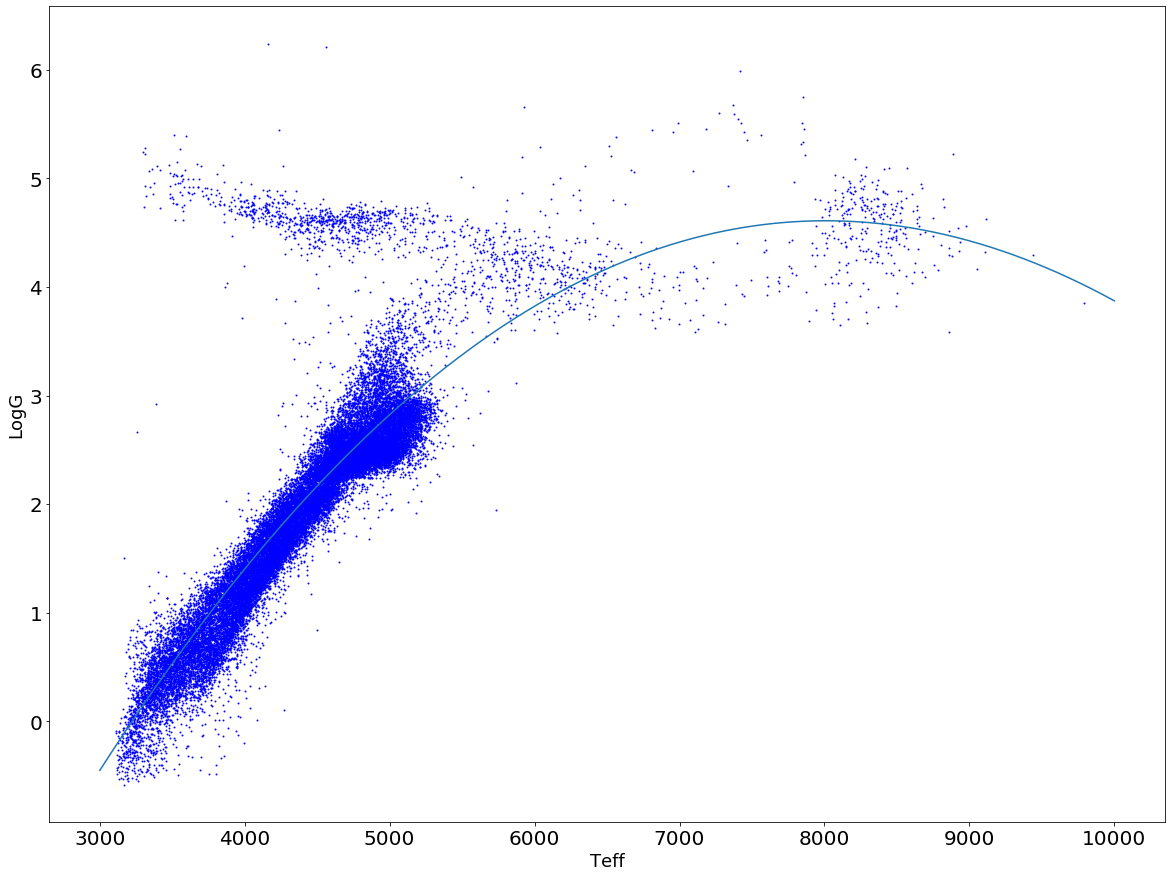

In [129]:
fig = plt.figure(figsize=(20,15))

gd2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']>=-1) & (star['GLAT']<=1) &\
    (star['TEFF']>0) &\
    (star['LogG']>=-5)

good2 = np.where(gd2)[0]  # apply to data

# now to make the fit, account for errors
def mcFit4(function, A, A_ERR, C, C_ERR, p0):
    a_param = list()
    b_param = list()
    c_param = list()
    d_param = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A + A_ERR*weights4A
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj)
        a_param.append(params[0])
        b_param.append(params[1])
        c_param.append(params[2])
        d_param.append(params[3])
    
    return a_param, b_param, c_param, d_param

A_output, B_output, C_output, D_output = mcFit4(poly3,star['TEFF'][good2], star['TEFF_ERR'][good2], star['LogG'][good2], star['LogG_ERR'][good2], 0)


print('mean A: {:6.4f}, mean B: {:6.4f}, mean C: {:6.4f}, mean D: {:6.4f}'.format(np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)))


ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good2],star['LogG'][good2],s=1,c='b',alpha=0.9)
xlin = np.linspace(3000,10000,1000)
ax.plot(xlin, poly3((xlin), np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)), label = 'Fit')  ## limits for linspace in x data plot?

ax.set_xlabel('Teff', fontsize=18)
ax.set_ylabel('LogG', fontsize=18)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

(a)A: 0 B: 0 C: 0.0035 D:-8.7631 \
(b)3rd order polynomial, however, a second order one works ok as well. \
(c)Yes, in the Teff range from 3000-5000 LogG range from 4-5. Top left of the data (Main Sequence stars)

## Problem B

Stars masked in GLAT < -10 or GLAT > 10. Fe_H v. O_Fe with their errors. Have only GLAT <=-10 for the time being because it isn't working with the or |.

mean A: -0.3524, mean B: -5.9477, mean C: 0.3368, mean D: -0.0229


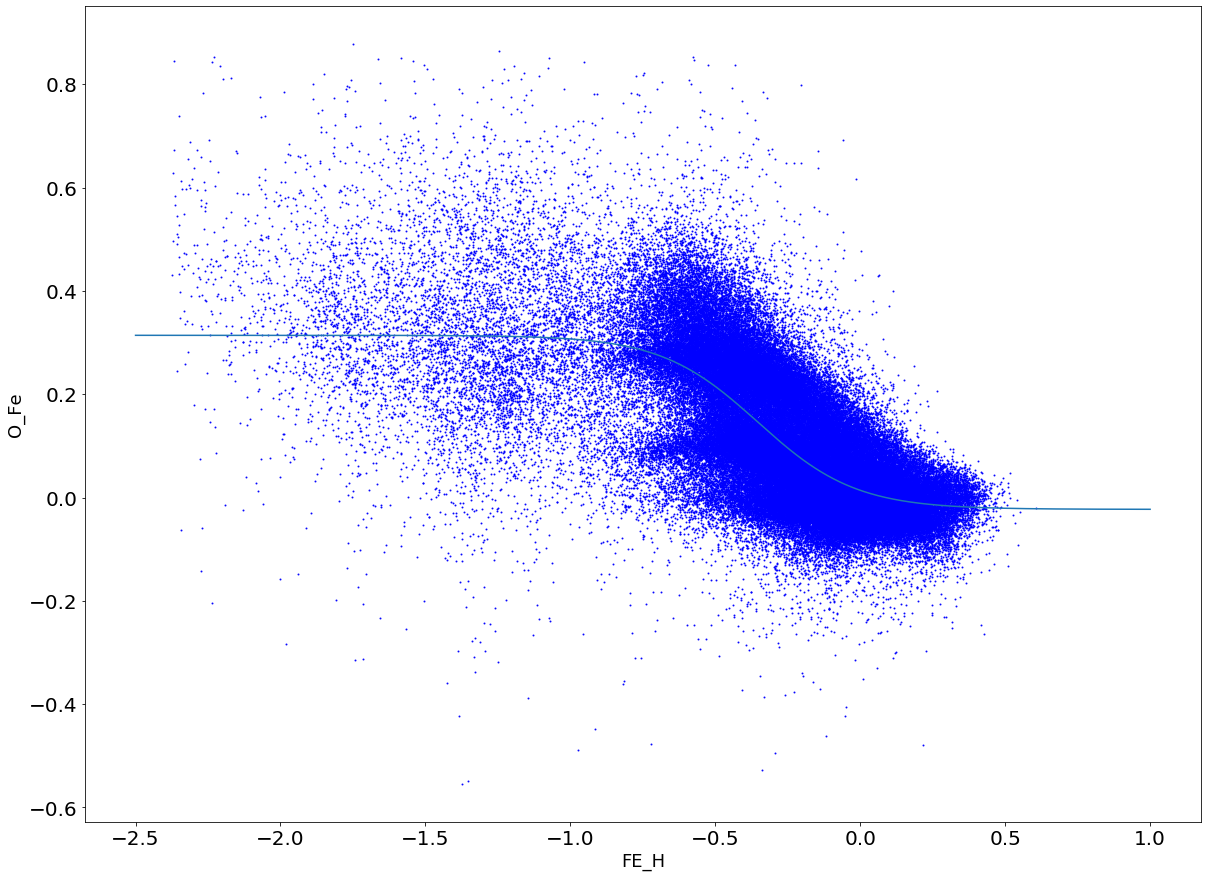

In [159]:
import numpy.ma as ma

fig = plt.figure(figsize=(20,15))

gd3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['O_FE']>-2000) &\
    (star['GLAT']>=10) 

 
good3 = np.where(gd3)[0]  # apply to data

#the fit 
def mcFit4(function, A, A_ERR, C, C_ERR):
    a_param = list()
    b_param = list()
    c_param = list()
    d_param = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A + A_ERR*weights4A
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj, p0=[0,0,0,0])
        a_param.append(params[0])
        b_param.append(params[1])
        c_param.append(params[2])
        d_param.append(params[3])
    
    return a_param, b_param, c_param, d_param

A_output, B_output, C_output, D_output = mcFit4(sigmoid,star['FE_H'][good3], star['FE_H_ERR'][good3], star['O_FE'][good3], star['O_FE_ERR'][good3])


print('mean A: {:6.4f}, mean B: {:6.4f}, mean C: {:6.4f}, mean D: {:6.4f}'.format(np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)))

ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][good3],star['O_FE'][good3],s=1,c='b',alpha=0.9)
xlin = np.linspace(-2.5,1.0,1000)                                                                 
ax.plot(xlin, sigmoid((xlin), np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)), label = 'Fit')

ax.set_xlabel('FE_H', fontsize=18)
ax.set_ylabel('O_Fe', fontsize=18)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

(a)A: -0.3524, B: -5.9477, C:0.3368, D:-0.0229 \
(b)Sigmoid \
(c)No second population \
note: since the "or" function was working well, we only plotted one half of the sky that we originally wanted to.

## Problem C

Fe_h v. O_Fe with their _ERR. -2<GLAT<2

mean A: 0.0019, mean B: -0.1539, mean C: 6.3014, mean D: -0.9916


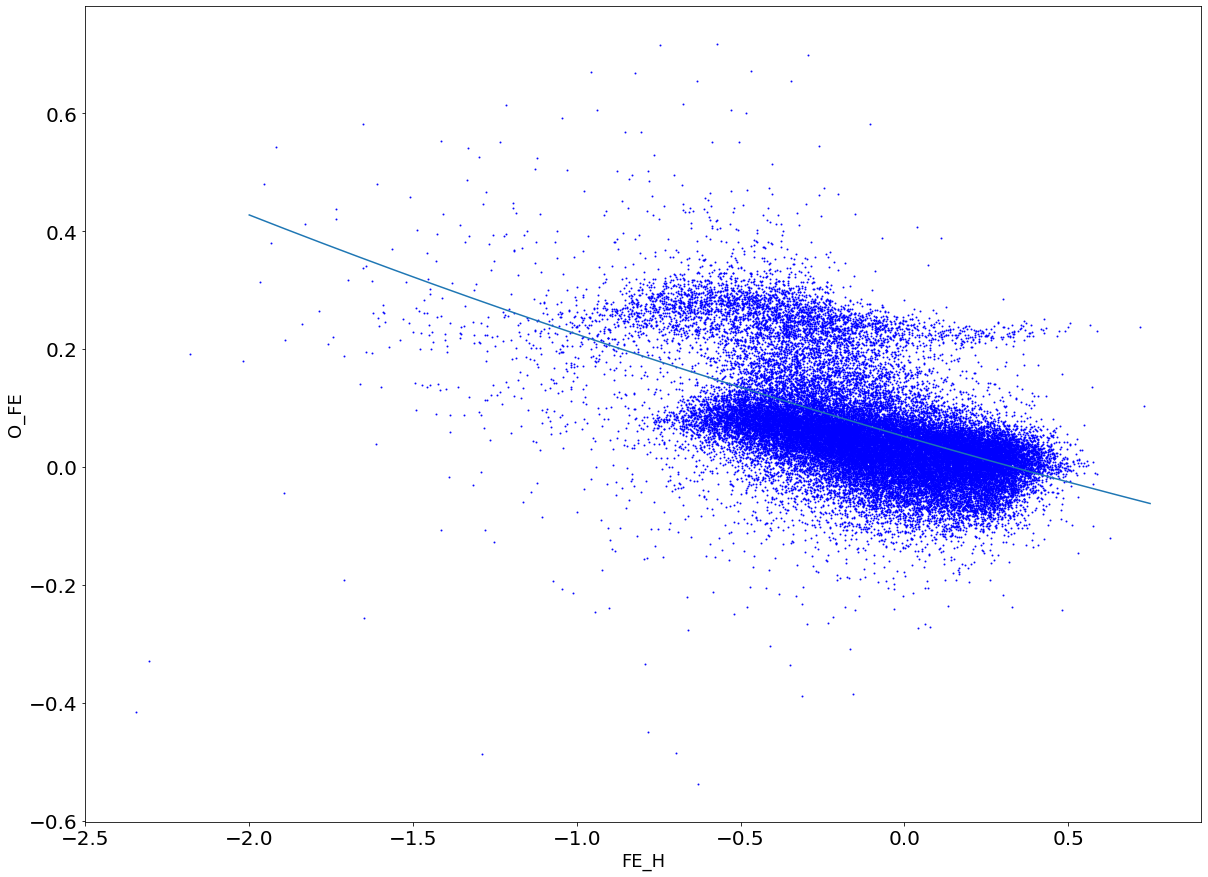

In [175]:
fig = plt.figure(figsize=(20,15))

gd4 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']>=-2) & (star['GLAT']<=2) &\
    (star['O_FE']>-5)
 
good4 = np.where(gd4)[0]  # apply to data

# the fit
def mcFit4(function, A, A_ERR, C, C_ERR):
    a_param = list()
    b_param = list()
    c_param = list()
    d_param = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A + A_ERR*weights4A
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj, p0=[0,0,6,0])
        a_param.append(params[0])
        b_param.append(params[1])
        c_param.append(params[2])
        d_param.append(params[3])
    
    return a_param, b_param, c_param, d_param

A_output, B_output, C_output, D_output = mcFit4(exponential,star['FE_H'][good4], star['FE_H_ERR'][good4], star['O_FE'][good4], star['O_FE_ERR'][good4])


print('mean A: {:6.4f}, mean B: {:6.4f}, mean C: {:6.4f}, mean D: {:6.4f}'.format(np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)))

ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][good4],star['O_FE'][good4],s=1,c='b',alpha=0.9)
xlin = np.linspace(-2.0,0.75,1000)
ax.plot(xlin, exponential(xlin, np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)), label = 'Fit')

ax.set_xlabel('FE_H', fontsize=18)
ax.set_ylabel('O_FE', fontsize=18)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

(a) A: 0.0019, B:-0.1539, C: 6.3014, D: -0.9916 \
(b) exponential \
(c) Second population is from Fe_H -1.0-0.5 and O_Fe 0.2-0.3, above the dominant feature. 

## Problem D

TEFF v. (J-K) with their _ERR... 
(J-K) will need to do the sigma=sqrt(s1**2-s2**2)

mean A: 5.5864, mean B: -0.0032, mean C: 11.3951, mean D: -17.0427


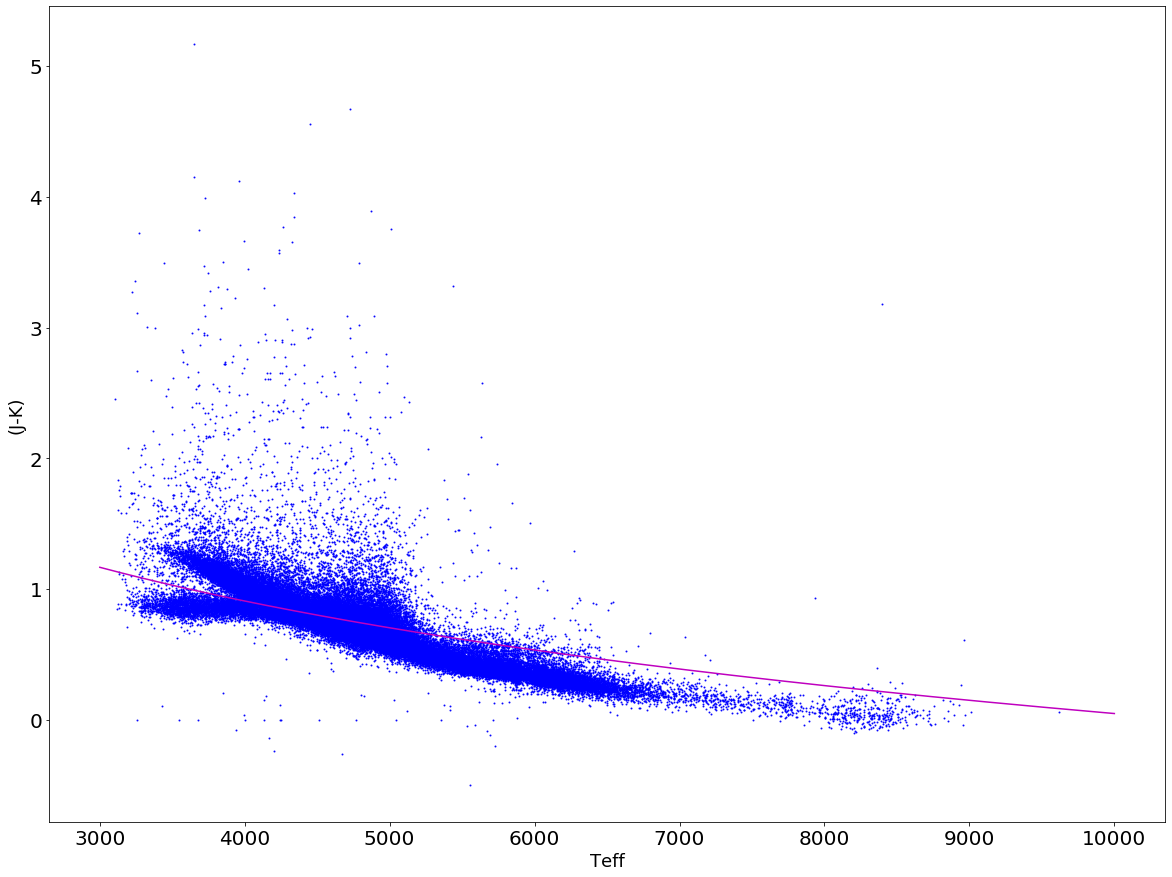

In [483]:
JK = np.subtract(star['J'], star['K'])
JK_ERR = np.sqrt((np.square(star['J_ERR']))+(np.square(star['K_ERR'])))

fig = plt.figure(figsize=(20,15))

gd5 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['TEFF']>=0) &\
    (star['GLAT']<=-10) &\
    (JK<=12)

good5 = np.where(gd5)[0]  # apply to data

# the fit
def mcFit4(function, A, A_ERR, C, C_ERR):
    a_param = list()
    b_param = list()
    c_param = list()
    d_param = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A + A_ERR*weights4A
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj, p0=[-1, 0.005, 2, 4])
        a_param.append(params[0])
        b_param.append(params[1])
        c_param.append(params[2])
        d_param.append(params[3])
    
    return a_param, b_param, c_param, d_param

#A_output, B_output, C_output, D_output = mcFit4(logfit,star['TEFF'][good5], star['TEFF_ERR'][good5], JK[good5], JK_ERR[good5])


print('mean A: {:6.4f}, mean B: {:6.4f}, mean C: {:6.4f}, mean D: {:6.4f}'.format(np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)))

ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good5],JK[good5],s=1,c='b',alpha=0.9)
xlin = np.linspace(3000,10000,1000)
#ax.plot(xlin, logfit((xlin), np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)), label = 'Fit')
ax.plot(xlin, logfit((xlin), -1,0.005,2,4), c='m', label='guess')

## A=+ shifts right, B=- gives shape, C=+ makes steeper, D=- vertical translation
   
ax.set_xlabel('Teff', fontsize=18)
ax.set_ylabel('(J-K)', fontsize=18)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

(a) A: -1, B:0.005, C: 2, D: 4 \
(b) logfit \
(c) there may be a second population above the fit, where the stars are more scattered. \

The fitting function in the mcFit would not fit the data even though I would give various good starting values by giving valid initial guesses. I did this technique with logfit and exponential to create a graph similar to what you see. The fit shown was done by me using the technique you recommended to find initial values. When I would give these values, python would still provide a "fit" 15 units down the y axis from the data itself. Eventually I ran out of time and had to turn the project in as is.   

## Problem E

GLON v. VHELIO_AVG -10<GLAT<10 with VERR on x axis

mean A: 56.1162, mean B: 0.0227, mean C: -106.0325, mean D: 1.2470


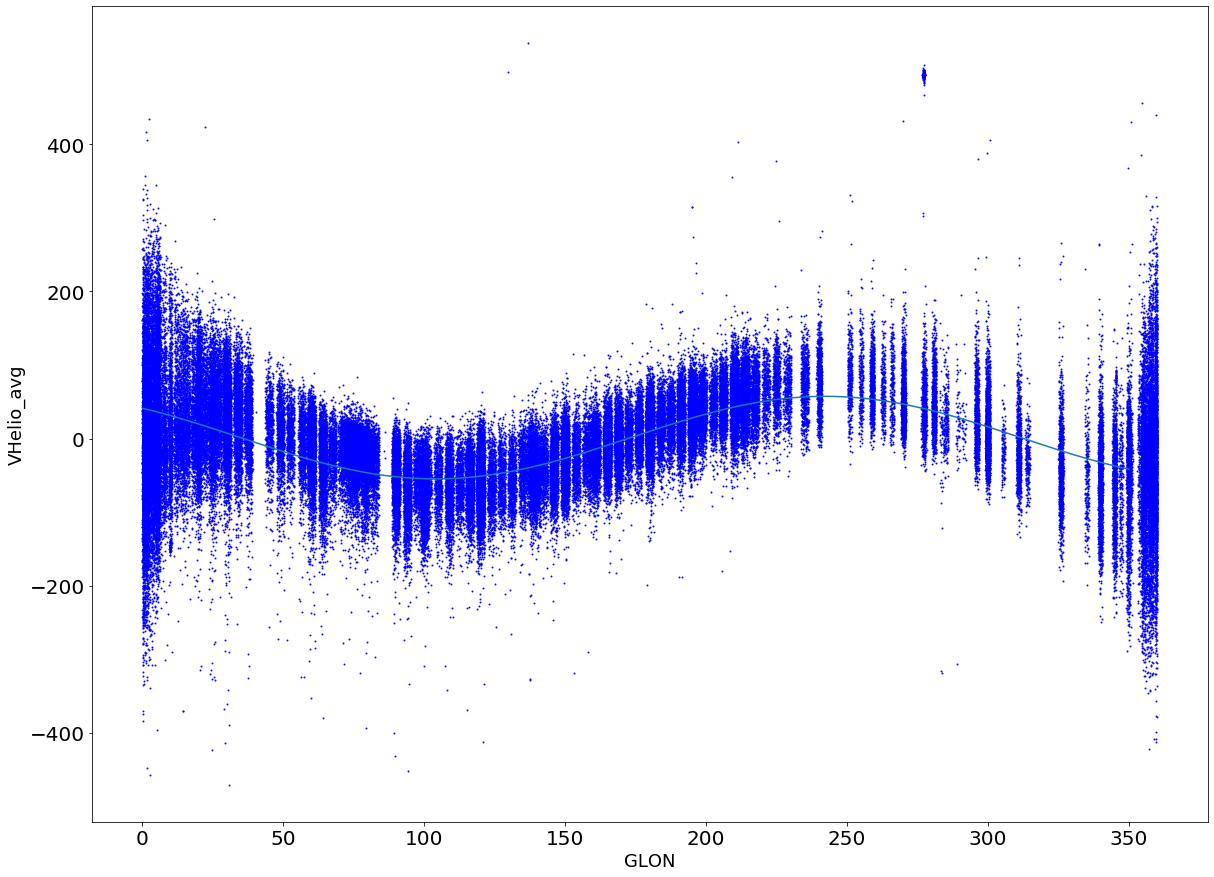

In [278]:
fig = plt.figure(figsize=(20,15))

gd6 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']>=-10) & (star['GLAT']<=10) &\
    (star['VHELIO_AVG']>-750) & (star['VHELIO_AVG']<750)
 
good6 = np.where(gd6)[0]  # apply to data

# the fit
def mcFit4(function, A, C, C_ERR):
    a_param = list()
    b_param = list()
    c_param = list()
    d_param = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A 
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj, p0=[200,0.015,-105,0])
        a_param.append(params[0])
        b_param.append(params[1])
        c_param.append(params[2])
        d_param.append(params[3])
    
    return a_param, b_param, c_param, d_param

A_output, B_output, C_output, D_output = mcFit4(cosfit,star['GLON'][good6], star['VHELIO_AVG'][good6], star['VERR'][good6])


print('mean A: {:6.4f}, mean B: {:6.4f}, mean C: {:6.4f}, mean D: {:6.4f}'.format(np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)))

ax = fig.add_subplot(111)
ax.scatter(star['GLON'][good6],star['VHELIO_AVG'][good6],s=1,c='b',alpha=0.9)
xlin = np.linspace(0,350,10000)
ax.plot(xlin, cosfit((xlin), np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)), c='m', label = 'Fit')
#ax.plot(xlin, cosfit((xlin), 200,0.015,-105,0))

## A=amplitude, B=frequency, C= horizontal translation, D= vertical translation

ax.set_xlabel('GLON', fontsize=18)
ax.set_ylabel('VHelio_avg', fontsize=18)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

(a) A: 56.1162, B: 0.0227, C: -106.0325, D: 1.2470 \
(b) cosfit \
(c) no second population

## Problem F

NVISITS v. VSCATTER for NVISITS>=1. VERR on x axis

mean A: 56.0017, mean B: -0.0478, mean C: -424.7974, mean D: 0.3928


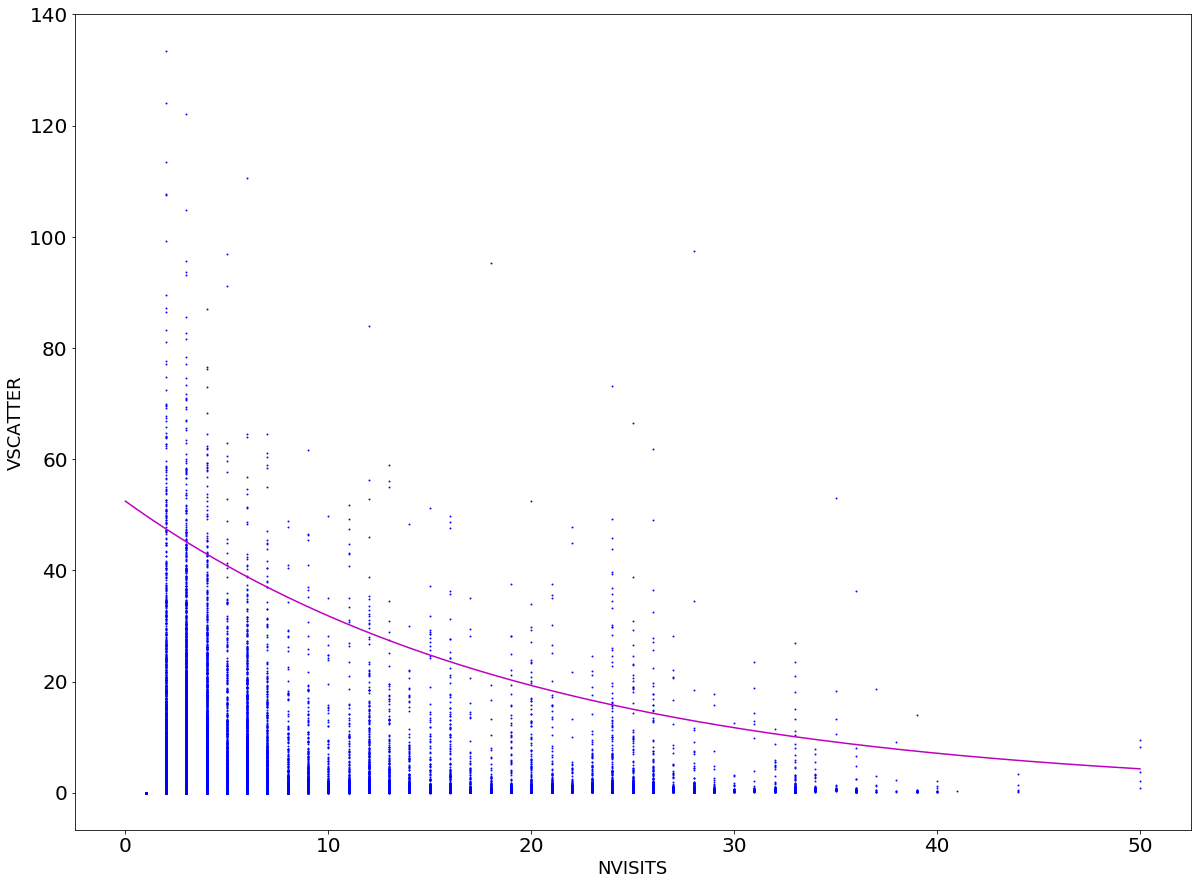

In [533]:
fig = plt.figure(figsize=(20,15))

gd7 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['NVISITS']>=1)
 
good7 = np.where(gd7)[0]  # apply to data

# the fit
def mcFit4(function, A, C, C_ERR):
    a_param = list()
    b_param = list()
    c_param = list()
    d_param = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A 
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj, p0=[0.13,-0.05,6,0])
        a_param.append(params[0])
        b_param.append(params[1])
        c_param.append(params[2])
        d_param.append(params[3])
    
    return a_param, b_param, c_param, d_param

#A_output, B_output, C_output, D_output = mcFit4(exponential, star['NVISITS'][good7], star['VSCATTER'][good7], star['VERR'][good7])


print('mean A: {:6.4f}, mean B: {:6.4f}, mean C: {:6.4f}, mean D: {:6.4f}'.format(np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output)))


ax = fig.add_subplot(111)
ax.scatter(star['NVISITS'][good7],star['VSCATTER'][good7],s=1,c='b',alpha=0.9)
xlin = np.linspace(0,50,1000)
#ax.plot(xlin, exponential((xlin), np.mean(A_output), np.mean(B_output), np.mean(C_output), np.mean(D_output))) 
ax.plot(xlin, exponential((xlin), 0.13, -0.05, 6, 0), c='m')

## A=+ shifts right, B=- gives shape, C=+ makes steeper, D=- vertical translation

ax.set_xlabel('NVISITS', fontsize=18)
ax.set_ylabel('VSCATTER', fontsize=18)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

(a) A: 0.13, B: -0.05, C: 6, D: 0 \
(b) exponential \
(c) There is no second population. \

Like problem D, the fitting function in the mcFit would not fit the data even though I would give various good starting values by giving valid initial guesses. I did this technique with logfit and exponential to create a graph similar to what you see. The fit shown was done by me using the technique you recommended to find initial values. When I would give these values, python would still provide a "fit" nowhere near to fitting the data itself. Eventually I ran out of time and had to turn the project in as is.   

## Problem G

FE_H v. NI_FE with both _ERR

mean slope: 0.0106, mean intercept: 0.0212


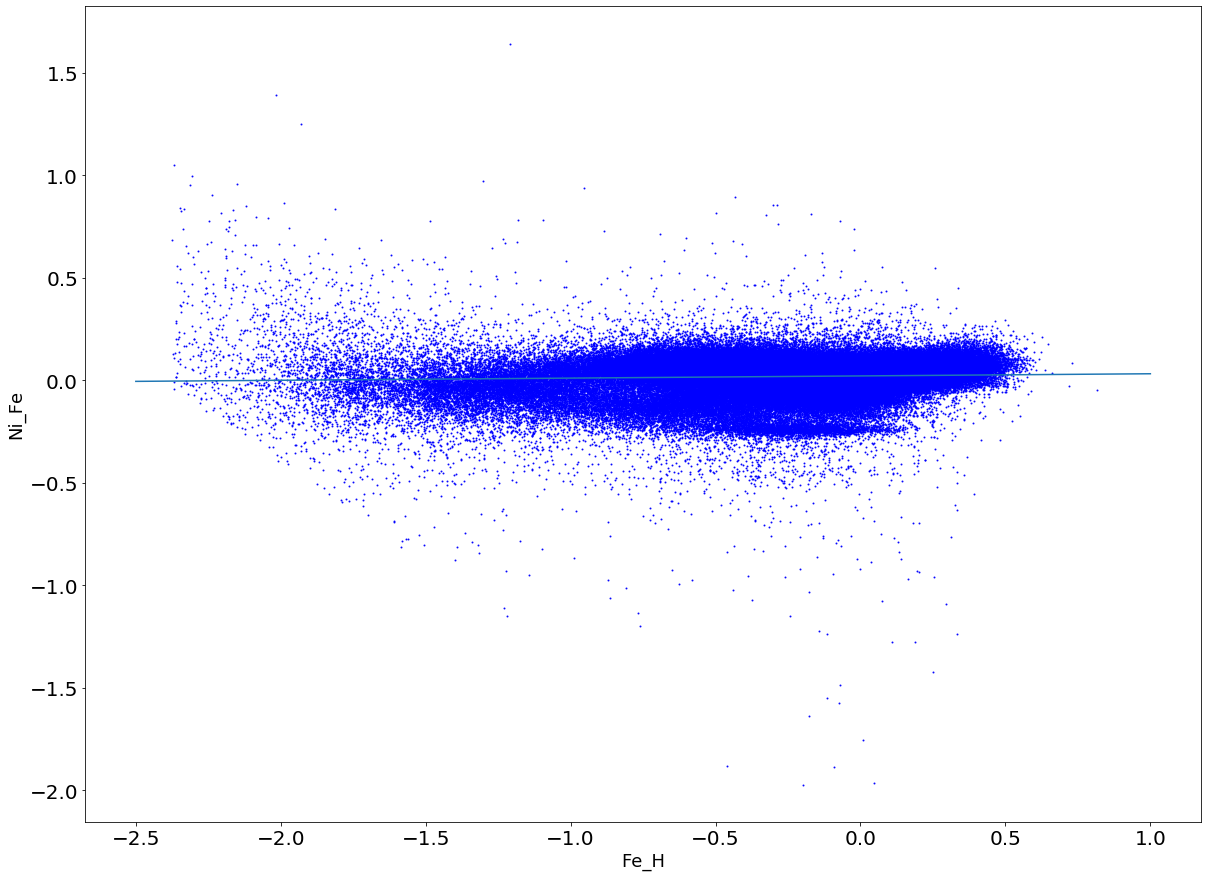

In [193]:
fig = plt.figure(figsize=(20,15))

gd8 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['NI_FE']>-1000)
 
good8 = np.where(gd8)[0]  # apply to data

# the fit
def mcFit2(function, A, A_ERR, C, C_ERR):
    slopes = list()
    ints = list()
    iters = 500 
    for i in range(iters):
       # remember random normal distribution (Gaussian)
        weights4A = np.random.randn(len(A))
        weights4C = np.random.randn(len(C))

        x_adj = A + A_ERR*weights4A
        y_adj = C + C_ERR*weights4C  

        params, other = opt.curve_fit(function, x_adj, y_adj, p0=[0,0])
        slopes.append(params[0])
        ints.append(params[1])
    
    return slopes, ints

A_output, C_output = mcFit2(linear,star['FE_H'][good8], star['FE_H_ERR'][good8], star['NI_FE'][good8], star['NI_FE_ERR'][good8])


print('mean slope: {:6.4f}, mean intercept: {:6.4f}'.format(np.mean(A_output), np.mean(C_output)))

ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][good8],star['NI_FE'][good8],s=1,c='b',alpha=0.9)
xlin = np.linspace(-2.5,1.0,1000)
ax.plot(xlin, linear((xlin), np.mean(A_output), np.mean(C_output)), label = 'Fit')

ax.set_xlabel('Fe_H', fontsize=18)
ax.set_ylabel('Ni_Fe', fontsize=18)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

(a) m:0.0106, b:0.0212 \
(b) linear \
(c) not particularly a second population, though I could maybe see an argument for the small Ni_fe range -0.2 to -0.3 Fe_h range from -0.5 to 0 stars. However, there is not a clear second population.